In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
from datetime import datetime
import tensorflow as tf

warnings.filterwarnings("ignore")
%load_ext tensorboard

In [3]:
# for tracking
from tensorflow.keras.callbacks import TensorBoard


In [4]:
df = pd.read_csv('clean_data.csv')
df.head()

Address       City      Price  Bedroom  Bathroom  Floors  Parking  \
0  Budhanilkantha  Kathmandu   90000000        6         3     2.0       10   
1  Budhanilkantha  Kathmandu   80000000        5         3     2.0        9   
2         Dhapasi  Kathmandu   70000000        5         3     2.0       12   
3       Baluwatar  Kathmandu  130000000        6         4     3.0        9   
4        Golfutar  Kathmandu  100000000        6         3     2.0       10   

   Face    Year      Area  Road Width     Road Type  Build Area  Amenities  \
0  West  2073.0   5476.00        20.0   Blacktopped    98568.00         16   
1  East  2073.0   7187.25        20.0   Blacktopped     7187.25         15   
2  East  2071.0   5818.25        20.0   Blacktopped    55102.25         16   
3  West  2017.0   7067.50        20.0   Blacktopped     7067.50         16   
4  East  2070.0  13792.75        20.0   Blacktopped    13792.75         16   

   Pricepersqft  
0  16435.354273  
1  11130.821942  
2  12031.109010  
3  18394.057305  
4   7250.185786

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1687 entries, 0 to 1686
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Address       1687 non-null   object 
 1   City          1687 non-null   object 
 2   Price         1687 non-null   int64  
 3   Bedroom       1687 non-null   int64  
 4   Bathroom      1687 non-null   int64  
 5   Floors        1687 non-null   float64
 6   Parking       1687 non-null   int64  
 7   Face          1687 non-null   object 
 8   Year          1687 non-null   float64
 9   Area          1687 non-null   float64
 10  Road Width    1687 non-null   float64
 11  Road Type     1687 non-null   object 
 12  Build Area    1687 non-null   float64
 13  Amenities     1687 non-null   int64  
 14  Pricepersqft  1687 non-null   float64
dtypes: float64(6), int64(5), object(4)
memory usage: 197.8+ KB


## Data Cleaning

In [6]:
null_counts = df.isnull().sum()
null_counts

Address         0
City            0
Price           0
Bedroom         0
Bathroom        0
Floors          0
Parking         0
Face            0
Year            0
Area            0
Road Width      0
Road Type       0
Build Area      0
Amenities       0
Pricepersqft    0
dtype: int64

In [169]:
# # calulate number of missing values for area and build area
# def count_na_values(column):
#     count = 0
#     for value in column:
#         if "N/A" in str(value):
#             count += 1
#     return count
# na_counts = df[['Area','Build Area']].apply(count_na_values)
# print(na_counts)

Area             0
Build Area    1770
dtype: int64


### Columns not used:
- title
- floors : 1172 out of 2209 values missing
- year : 1629 out of 2209 values missing
- road : dependent on road width and road type
- build area : 1772 out of 2209 values missing
- posted
- amenities: 1067 out of 2209 values missing

In [170]:
# sel_cols = ['Address','City','Bedroom','Bathroom','Parking','Face','Views','Area','Road Width','Road Type']
# X = df[sel_cols].copy()
# y = df['Price']
# # print(X.tail())
# # print(y)

In [15]:
X = df.drop('Price',axis=1)
y = df['Price']

In [171]:
# # keep the middle values of the address columns only
# X['Address'] = X['Address'].str.split(',').str[1]
# # print(X['Address'])

In [172]:
# #convert views like 1k to 1000
# def convert_views_to_numeric(value):
#     if 'K' in value:
#         return float(value.replace('K', '')) * 1000
#     else:
#         return float(value)

# X['Views'] = X['Views'].apply(convert_views_to_numeric)
# # print(X['Views'])

In [173]:
# #convert all areas to squre feet
# def remove_chars(value):
#     pattern = r'[-./,+]' # matches any of the characters '-', '.', '/', ',', '+'
#     return re.sub(pattern, '', value)

# def convert_to_square_feet(value):
#     # print(value)
#     value = remove_chars(value)
#     if 'Aana' in value:
#         return float(value.replace('Aana', '')) * 342.25      
#     elif 'Ropani' in value:
#         return float(value.replace('Ropani', '')) * 5476
#     elif 'ropani aana' in value:
#         return float(value.replace('ropani', '')) * 5476
#     elif 'Kattha' in value:
#         return float(value.replace('Kattha', '')) * 3645
#     elif 'Dhur' in value:
#         return float(value.replace('Dhur', '')) * 182.25
#     elif 'Sq. Feet' in value:
#         return float(value.replace('Sq. Feet', ''))
#     else:
#         return None

# X['Area'] = X['Area'].apply(convert_to_square_feet)
# X['Area'].fillna(X['Area'].mode()[0], inplace=True)
# # TODO
# # PREDICT THE AREA AND FILL NA
# # print(X['Area'])

In [174]:
# # convert road widht to int
# def remove_unit(value):
#     if 'Meter' in value:
#         return float(value.replace('Meter','')) * 3.28084
#     else:
#         return float(value.replace('Feet',''))
    
# X['Road Width'] = X['Road Width'].apply(remove_unit)

In [175]:
# X.head()

Address       City  Bedroom  Bathroom  Parking  Face  Views  \
0   Budhanilkantha  Kathmandu        6         3       10  West   17.0   
1   Budhanilkantha  Kathmandu        5         3        9  East   26.0   
2          Dhapasi  Kathmandu        5         3       12  East  154.0   
3        Baluwatar  Kathmandu        6         4        9  West   17.0   
4         Golfutar  Kathmandu        6         3       10  East   59.0   

       Area  Road Width     Road Type  
0  342250.0        20.0   Blacktopped  
1  718725.0        20.0   Blacktopped  
2  376475.0        20.0   Blacktopped  
3  345672.5        20.0   Blacktopped  
4  657120.0        20.0   Blacktopped

In [176]:
# # leaving Address for now
# X_1 = X.drop('Address',axis=1)
# # X_1.info()

## One hot encoding and feature scaling

In [16]:
# one hot encoding for city, face and road type
from sklearn.preprocessing import OneHotEncoder

obj_cols = ['City','Face','Road Type','Address']
X_encoded = pd.get_dummies(X,columns=obj_cols)
# X_encoded.info()

In [17]:
# standard data scaling
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(X_encoded)
X_scaled = pd.DataFrame(X_scaled)
# X_scaled.info()

## Data Visualization

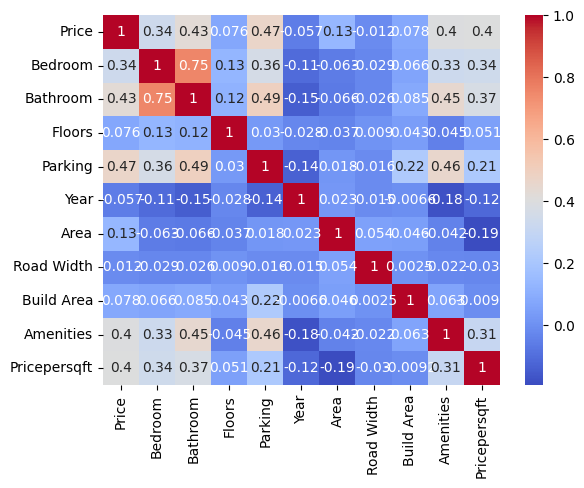

In [18]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Visualize the correlation matrix using a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [180]:
# # histogram plots
# fig, axs = plt.subplots(X_1.shape[1], figsize=(5, 40))

# for i, column in enumerate(X_1.columns):
#     axs[i].hist(X_1[column])
#     axs[i].set_title(column)

# plt.show()

In [181]:
# for col in X_1.columns:
#     if X_1[col].dtype != object:  # plot only numeric columns
#         fig, ax = plt.subplots()
#         ax.boxplot(X_1[col])
#         ax.set_title(col)
#         plt.show()

## Training

In [19]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=42)

### Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression

lin_reg_without_regu_model = LinearRegression()
lin_reg_without_regu_model.fit(X_encoded, y)


LinearRegression()

In [21]:
y_pred_train_lin_reg_without_regu = lin_reg_without_regu_model.predict(X_train)
y_pred_test_lin_reg_without_regu = lin_reg_without_regu_model.predict(X_test)

In [185]:
log_dir = "logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

In [22]:

from sklearn.metrics import mean_squared_error,mean_absolute_error

mse_train_lin_reg_without_regu = mean_squared_error(y_pred_train_lin_reg_without_regu,y_train)
mse_test_lin_reg_without_regu = mean_squared_error(y_pred_test_lin_reg_without_regu,y_test)
print(f'MSE for train set for linear regresson without regularization {mse_train_lin_reg_without_regu}' )
print(f'MSE for test set for linear regresson without regularization {mse_test_lin_reg_without_regu}')
# Log metrics to TensorBoard
# with tf.summary.create_file_writer(log_dir).as_default():
#     tf.summary.scalar('Train MSE linear regression without regularization', mse_train_lin_reg_without_regu, step=1)
#     tf.summary.scalar('Test MSE linear regression without regularization', mse_test_lin_reg_without_regu, step=1)

mae_train_lin_reg_without_regu = mean_absolute_error(y_pred_train_lin_reg_without_regu,y_train)
mae_test_lin_reg_without_regu = mean_absolute_error(y_pred_test_lin_reg_without_regu,y_test)
print(f'mae for train set for linear regresson without regularization {mae_train_lin_reg_without_regu}' )
print(f'mae for test set for linear regresson without regularization {mae_test_lin_reg_without_regu}')
# Log metrics to TensorBoard
# with tf.summary.create_file_writer(log_dir).as_default():
#     tf.summary.scalar('Train mae linear regression without regularization', mae_train_lin_reg_without_regu, step=1)
#     tf.summary.scalar('Test mae linear regression without regularization', mae_test_lin_reg_without_regu, step=1)

MSE for train set for linear regresson without regularization 5.7711197273151736e+16
MSE for test set for linear regresson without regularization 5.6463253128802584e+16
mae for train set for linear regresson without regularization 235800065.41193885
mae for test set for linear regresson without regularization 232950818.41687337


### Lasso Regression


In [23]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

y_pred_train_lasso = lasso_model.predict(X_train)
y_pred_test_lasso = lasso_model.predict(X_test)
mse_train_lasso = mean_squared_error(y_train, y_pred_train_lasso)
mse_test_lasso = mean_squared_error(y_test, y_pred_test_lasso)
print(f"Train MSE lasso: {mse_train_lasso}")
print(f"Test MSE lasso: {mse_test_lasso}")

Train MSE lasso: 695718127107509.2
Test MSE lasso: 543368885601132.2


### XGBoost

In [24]:
import xgboost as xgb

params = {
    "objective": "reg:squarederror",
    "eta": 0.1,
    "max_depth": 6,
    "min_child_weight": 1,
    "subsample": 0.7,
    "colsample_bytree": 0.7,
    "seed": 42,
}

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

xgb_model = xgb.train(params, dtrain, num_boost_round=100)

y_pred_train_xgb = xgb_model.predict(dtrain)
y_pred_test_xgb = xgb_model.predict(dtest)

mse_train_xgb = mean_squared_error(y_train, y_pred_train_xgb)
mse_test_xgb = mean_squared_error(y_test, y_pred_test_xgb)
print("MSE train xgb:", mse_train_xgb)
print("MSE test xgb:", mse_test_xgb)

MSE train xgb: 2778615486462.1523
MSE test xgb: 205669747060403.28


### Decision Tree


In [25]:
# from sklearn.tree import DecisionTreeRegressor

# dt_model =  DecisionTreeRegressor(random_state=42)
# dt_model.fit(X_train,y_train)


# y_pred_train_dt = dt_model.predict(X_train)
# y_pred_test_dt = dt_model.predict(X_test)

# mse_train_dt = mean_squared_error(y_train, y_pred_train_dt)
# mse_test_dt = mean_squared_error(y_test, y_pred_test_dt)
# print("MSE train dt:", mse_train_dt)
# print("MSE test dt:", mse_test_dt)

MSE train dt: 0.0
MSE test dt: 867371530915384.6


### SVM

In [27]:
from sklearn.svm import SVR

svr_model = SVR(kernel="linear")
svr_model.fit(X_train, y_train)

y_pred_train_svr = svr_model.predict(X_train)
y_pred_test_svr = svr_model.predict(X_test)

mae_train_svr = mean_absolute_error(y_train, y_pred_train_svr)
mae_test_svr = mean_absolute_error(y_test, y_pred_test_svr)

print(f"Train MAE: {mae_train_svr:.2f}")
print(f"Test MAE: {mae_test_svr:.2f}")
# Log metrics to TensorBoard
# with tf.summary.create_file_writer(log_dir).as_default():
#     tf.summary.scalar('MAE_train_svr', mae_train_svr, step=1)
#     tf.summary.scalar('MAE_test', mae_test_svr, step=1)

mse_train_svr = mean_squared_error(y_train, y_pred_train_svr)
mse_test_svr = mean_squared_error(y_test, y_pred_test_svr)

print(f"Train mse: {mse_train_svr:.2f}")
print(f"Test mse: {mse_test_svr:.2f}")
# Log metrics to TensorBoard
# with tf.summary.create_file_writer(log_dir).as_default():
#     tf.summary.scalar('mse_train_svr', mse_train_svr, step=1)
#     tf.summary.scalar('mse_test', mse_test_svr, step=1)


Train MAE: 18829248.24
Test MAE: 18504865.33
Train mse: 1268034205924302.50
Test mse: 935508440221743.75


In [199]:
# svr_model = SVR(kernel="poly")
# svr_model.fit(X_train, y_train)

# y_pred_train_svr = svr_model.predict(X_train)
# y_pred_test_svr = svr_model.predict(X_test)

# mae_train_svr = mean_absolute_error(y_train, y_pred_train_svr)
# mae_test_svr = mean_absolute_error(y_test, y_pred_test_svr)

# print(f"Train MAE: {mae_train_svr:.2f}")
# print(f"Test MAE: {mae_test_svr:.2f}")
# # Log metrics to TensorBoard
# with tf.summary.create_file_writer(log_dir).as_default():
#     tf.summary.scalar('MAE_train_svr', mae_train_svr, step=1)
#     tf.summary.scalar('MAE_test', mae_test_svr, step=1)

# mse_train_svr = mean_squared_error(y_train, y_pred_train_svr)
# mse_test_svr = mean_squared_error(y_test, y_pred_test_svr)

# print(f"Train mse: {mse_train_svr:.2f}")
# print(f"Test mse: {mse_test_svr:.2f}")
# # Log metrics to TensorBoard
# with tf.summary.create_file_writer(log_dir).as_default():
#     tf.summary.scalar('mse_train_svr', mse_train_svr, step=1)
#     tf.summary.scalar('mse_test', mse_test_svr, step=1)


Train MAE: 504318420950.70
Test MAE: 16991716207.41
Train mse: 71738037284480403132907520.00
Test mse: 127262188370372000219136.00


In [200]:
# svr_model = SVR(kernel="sigmoid")
# svr_model.fit(X_train, y_train)

# y_pred_train_svr = svr_model.predict(X_train)
# y_pred_test_svr = svr_model.predict(X_test)

# mae_train_svr = mean_absolute_error(y_train, y_pred_train_svr)
# mae_test_svr = mean_absolute_error(y_test, y_pred_test_svr)

# print(f"Train MAE: {mae_train_svr:.2f}")
# print(f"Test MAE: {mae_test_svr:.2f}")
# # Log metrics to TensorBoard
# with tf.summary.create_file_writer(log_dir).as_default():
#     tf.summary.scalar('MAE_train_svr', mae_train_svr, step=1)
#     tf.summary.scalar('MAE_test', mae_test_svr, step=1)

# mse_train_svr = mean_squared_error(y_train, y_pred_train_svr)
# mse_test_svr = mean_squared_error(y_test, y_pred_test_svr)

# print(f"Train mse: {mse_train_svr:.2f}")
# print(f"Test mse: {mse_test_svr:.2f}")
# # Log metrics to TensorBoard
# with tf.summary.create_file_writer(log_dir).as_default():
#     tf.summary.scalar('mse_train_svr', mse_train_svr, step=1)
#     tf.summary.scalar('mse_test', mse_test_svr, step=1)


Train MAE: 504318421433.57
Test MAE: 16991716251.10
Train mse: 71738037284497668901437440.00
Test mse: 127262188371878275448832.00
